In [5]:
import os
import sys
import json
import subprocess
import re
from pathlib import Path
import torch
import matplotlib.pyplot as plt

In [6]:
def run_mmalign_and_get_tmscore(reference, model):
    # Define the command
    command = ["./../USalign/MMalign", reference, model]
    
    # Run the command and capture the output
    result = subprocess.run(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
    
    # Check if the command was successful
    if result.returncode != 0:
        print("Error running MM-align:")
        print(result.stderr)
        return None
    
    # Extract the TM-score from the output
    output = result.stdout
    tm_score_match = re.search(r"TM-score=\s+([\d\.]+)", output)
    
    if tm_score_match:
        tm_score = float(tm_score_match.group(1))
        return torch.tensor(tm_score)
    else:
        return torch.nan

In [7]:
name = "H1144"

def out_path(index):
    return os.path.join("output", f"{name}_{index}_unrelaxed.pdb")

reference = os.path.join("references", f"{name}.pdb")

In [15]:
tm_scores = []

for i in range(1, 85):
    tm_score = run_mmalign_and_get_tmscore(0, out_path(i))
    tm_scores.append(1 - tm_score)



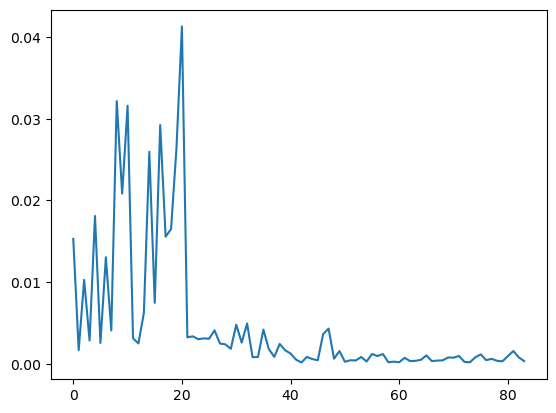

In [16]:
plt.plot(tm_scores)

In [18]:
run_mmalign_and_get_tmscore(out_path(0), out_path(20))

tensor(0.8389)